# PyTorch
PyTorch is an open-source machine learning library used for applications such as computer vision and natural language processing. It is known for its flexibility, ease of use, and as a powerful tool for research. Developed by Facebook's AI Research lab, PyTorch provides two high-level features: Tensor computation (like NumPy) with strong GPU acceleration and deep neural networks built on a tape-based autograd system.

## Tensors: Definition, Creation, and Operations
A tensor is a multi-dimensional array, which is a fundamental data structure in PyTorch. Tensors are similar to NumPy’s ndarrays, but they can also be used on a GPU to accelerate computing.

In [1]:
import torch

# Create a tensor with default floating-point data type:
x = torch.tensor([2, 1, 10])

# Create a 2x3 tensor filled with zeros:
y = torch.zeros(2, 3)

# Create a tensor with random numbers:
z = torch.rand(3, 3)
x, y, z

(tensor([ 2,  1, 10]),
 tensor([[0., 0., 0.],
         [0., 0., 0.]]),
 tensor([[0.0598, 0.5531, 0.7379],
         [0.2318, 0.8570, 0.3808],
         [0.7311, 0.3703, 0.0036]]))

### torch.rand(): 
Generates random numbers from a uniform distribution over the interval [0, 1). This means that each number within this range is equally likely to be generated. The numbers are spread evenly over the specified range, and we can expect the mean of the generated values to be close to 0.5.

### torch.randn(): 
Generates random numbers from a standard normal (Gaussian) distribution with mean 0 and variance 1. This distribution is also known as the bell curve due to its shape. In a normal distribution, values are more likely to be closer to the mean (0 in this case) and less likely to be found at the extremes.

In [2]:
import torch

# Generates a tensor with random numbers from a uniform distribution
uniform_random_tensor = torch.rand(3, 3)  # Numbers between 0 and 1

# Generates a tensor with random numbers from a normal distribution
normal_random_tensor = torch.randn(3, 3)  # Numbers with mean 0 and variance 1

# Generate a tensor of integer numbers for 1 to 3(not included), size = 3*3
integer_random_tensor = torch.randint(1, 3, (3, 3))

print("Uniform random tensor:", uniform_random_tensor)
print("Normal random tensor:", normal_random_tensor)
print("Inger ranodm tenosr:", integer_random_tensor)

Uniform random tensor: tensor([[0.6898, 0.0221, 0.4321],
        [0.5604, 0.3931, 0.8983],
        [0.7991, 0.1926, 0.9275]])
Normal random tensor: tensor([[ 0.6823, -1.2644, -0.0284],
        [-0.4727,  0.1942,  0.2009],
        [-1.0539, -1.9610, -1.2347]])
Inger ranodm tenosr: tensor([[2, 2, 2],
        [2, 2, 1],
        [1, 2, 2]])


### mean(axis = 0) vs mean(axis = 1) 
[same concept applicable  for other similar methods]

In [3]:
# Compute the mean along axis 0 (collapsing rows, averaging columns)
mean_axis_0 = uniform_random_tensor.mean(axis=0)

# Compute the mean along axis 1 (collapsing columns, averaging rows)
mean_axis_1 = uniform_random_tensor.mean(axis=1)

print("Mean along axis 0 (average of columns):", mean_axis_0)
print("Mean along axis 1 (average of rows):", mean_axis_1)

Mean along axis 0 (average of columns): tensor([0.6831, 0.2026, 0.7527])
Mean along axis 1 (average of rows): tensor([0.3813, 0.6173, 0.6397])


## Tensor Operations

In [4]:
# Addition
x = torch.tensor([5, 10, 20])
y = torch.rand(3)
print(x + y) #Position wise add

# Matrix multiplication
a = torch.ones(2, 3)
b = torch.ones(3, 2)
print(torch.matmul(a, b))

# Element-wise multiplication
print(a * b.t())  # .t() is for transpose


tensor([ 5.0471, 10.1518, 20.9613])
tensor([[3., 3.],
        [3., 3.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [5]:
w = torch.tensor([[1, 2, 3], [4, 5, 6]])
b = torch.tensor([[1, 2], [3, 4], [5, 6]])

print(w + w)

tensor([[ 2,  4,  6],
        [ 8, 10, 12]])


In [6]:
# not possible due to dimention mitch match (must show en error)

#print(w * b) 
#RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

In [7]:
b, b.t()

(tensor([[1, 2],
         [3, 4],
         [5, 6]]),
 tensor([[1, 3, 5],
         [2, 4, 6]]))

In [8]:
# now it has matching dimentions for element wise multiplication
w * b.t()

tensor([[ 1,  6, 15],
        [ 8, 20, 36]])

In [9]:
# not possible due to dimention mitch match (must show en error)
# torch.matmul(w, b.t()) #RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x3 and 2x3)

# Autograd: Automatic Differentiation
PyTorch’s autograd feature allows you to calculate the gradient of a computation graph dynamically. This is useful for training neural networks.



In [10]:
# Create tensors with `requires_grad=True` to track computation
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# Perform some operations
y = x * 2
z = y.mean()

# Calculate gradients
z.backward()

# Print gradients d(z)/dx
print(x.grad)


tensor([0.6667, 0.6667, 0.6667])


In [11]:
print(y.grad)

None


/opt/anaconda3/lib/python3.9/site-packages/torch/_tensor.py:1104: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1646756029501/work/build/aten/src/ATen/core/TensorBody.h:475.)
  return self._grad


x is a tensor with requires_grad=True, so PyTorch will track operations on it to compute gradients later.

y is derived from x, and since x has requires_grad=True, operations on y are also tracked, and y inherits the requires_grad property from x.

z is the mean of y, and it is a scalar (a single value), which makes it suitable for calling z.backward(), triggering the computation of gradients.

When we call z.backward(), PyTorch computes the gradient of z with respect to x, which is stored in x.grad. However, y.grad and z.grad are not computed because:

* By default, PyTorch only accumulates gradients for leaf nodes in the computation graph, where a leaf node is a node that has requires_grad=True and was created by the user, not as the result of an operation. In this case, x is a leaf node, but y and z are not, because they are the results of operations.

* Gradients are not computed for non-scalar outputs by default. Since y and z are not leaf nodes and the backward operation is called on z, the gradients are only calculated for x. PyTorch does this to save memory and computation since gradients are typically only needed for the parameters we wish to optimize (like x in this case).

## GPU Acceleration
PyTorch can utilize GPUs to speed up its tensor computations.

In [12]:
# Check if CUDA is available
if torch.cuda.is_available():
    x = x.to('cuda')

# Perform operations on GPU
y = x * 2
print(y)


tensor([2., 4., 6.], grad_fn=<MulBackward0>)


# Core PyTorch Modules


##  1. torch.nn: Building Blocks for Neural Networks
The torch.nn module in PyTorch provides the necessary building blocks for designing and creating neural networks. These building blocks include layers, activation functions, and utilities for assembling and managing these components.

In [13]:
import torch.nn as nn

### 1.1 Layers

Layers are the fundamental units that process data in a neural network. Common types of layers include:

In [14]:
#Linear Layers (nn.Linear): Implements a fully connected linear layer.
linear_layer = nn.Linear(10, 5) # nn.Linear(in_features=10, out_features=5) #10 inputs, 5 outputs 

In [15]:
#Convolutional Layers (nn.Conv2d): Applies a 2D convolution over an input signal.
conv_layer = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)

In [16]:
#Recurrent Layers (nn.LSTM, nn.GRU): Layers for processing sequential data.
lstm_layers = nn.LSTM(input_size = 10, hidden_size = 20, num_layers = 2)

### 1.2 Activation Functions

Activation functions introduce non-linearity into the network, allowing it to learn complex patterns, some common example includes:

In [17]:
# ReLU (nn.ReLU): A common activation function that outputs the input if it's positive, otherwise, it outputs zero.
relu = nn.ReLU()

In [18]:
# Sigmoid (nn.Sigmoid): Transforms inputs into a range between 0 and 1, often used for binary classification.
sigmoid = nn.Sigmoid()

In [19]:
# Softmax (nn.Softmax): Used for multi-class classification, turning logits into probabilities.
softmax = nn.Softmax(dim=1)

## 2. torch.optim: Optimization Algorithms for Training
The torch.optim module provides implementations of various optimization algorithms used for training neural networks. These algorithms adjust the weights of the network to minimize the loss function.



In [20]:
import torch.optim as optim

### 2.1 Common Optimizers

In [21]:
# SGD (Stochastic Gradient Descent): A basic yet effective optimization method.
#optimization would be applied to model's parameter using assigned learning rate
#optimizer = optim.SGD(model.parameters(), lr = 0.01) #need to create the model first

In [22]:
# Adam: An optimizer that adapts the learning rate for each weight.
#optimizer = optim.Adam(model.parameters(), lr = 0.001)

#### 2.2 Using an Optimizer

To use an optimizer, we need to perform the following steps in your training loop:

* Zero the gradients (optimizer.zero_grad()).
* Compute the loss.
* Backpropagate (loss.backward()).
* Update the model parameters (optimizer.step()).

## 3. torch.utils.data: Utilities for Data Loading and Preprocessing
The torch.utils.data module provides tools for data loading and preprocessing, making it easier to feed data into your model.

### 3.1 Datasets and DataLoaders

### Dataset: 
An abstract class for representing a dataset. We can use built-in datasets (like CIFAR10, MNIST) or create our own custom dataset by subclassing Dataset.

#### Built-in datset example:

In [23]:
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# transformed_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# dataloader = DataLoader(transformed_dataset, batch_size=4, shuffle=True)


#### Custom dataset example:

In [24]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


The double underscores (often referred to as "dunder" methods) in Python indicate special methods that provide an interface for built-in behaviors or operations. 
To call these special methods, you usually don't invoke them directly using their names (like __len__() or __getitem__()). Instead, you use Python's built-in functions or operators that are designed to automatically trigger these methods. 

In [25]:
# Create an instance of the custom dataset
data = torch.randn(100, 10)  # Example data: 100 samples, 10 features each
labels = torch.randint(0, 2, (100,))  # Example labels: 100 binary labels
dataset = CustomDataset(data, labels)

In [26]:
# Get the length of the dataset
#We call __len__ indirectly by using the len() function on an instance of the dataset class.

print(f"Dataset length: {len(dataset)}")

Dataset length: 100


In [27]:
# Access a single data point 
# we call __getitem__ by using the indexing syntax on the dataset instance.

item, label = dataset[5]
print(f"Sample data point: {item}, Label: {label}")


Sample data point: tensor([ 0.7799, -0.5421,  1.6364, -0.6426,  0.5164,  0.0960, -0.2462, -2.3722,
        -2.0264,  3.5598]), Label: 0


### DataLoader: 
Combines a dataset and a sampler, providing an iterable over the given dataset.

In [28]:
# Using the dataset with DataLoader
dataloader = DataLoader(dataset, batch_size = 15, shuffle = True)
for batch_idx, (data, labels) in enumerate(dataloader):
    print(f"Batch {batch_idx}: Data {data.size()}, Labels {labels.size()}")
    # Here we would typically proceed with processing the data and labels

Batch 0: Data torch.Size([15, 10]), Labels torch.Size([15])
Batch 1: Data torch.Size([15, 10]), Labels torch.Size([15])
Batch 2: Data torch.Size([15, 10]), Labels torch.Size([15])
Batch 3: Data torch.Size([15, 10]), Labels torch.Size([15])
Batch 4: Data torch.Size([15, 10]), Labels torch.Size([15])
Batch 5: Data torch.Size([15, 10]), Labels torch.Size([15])
Batch 6: Data torch.Size([10, 10]), Labels torch.Size([10])


## 3.2 Preprocessing

Preprocessing steps like normalization and data augmentation can be integrated with dataset:

#### Example with image data

In [29]:
import torch
from torchvision import datasets, transforms

# Load a sample dataset (e.g., CIFAR10)
# dataset = datasets.CIFAR10(root='./data', train=True, download=True)


Files already downloaded and verified


In [30]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Resize(256),  # Resize images to 256x256 pixels
    transforms.CenterCrop(224),  # Crop images to 224x224 pixels
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize images
                         std=[0.229, 0.224, 0.225])
])

In [31]:
# Apply transformations to the dataset
# transformed_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)


Files already downloaded and verified


In [32]:
# Create a data loader
dataloader = DataLoader(transformed_dataset, batch_size=32, shuffle=True)

In [33]:
# Iterate over the data loader
for images, labels in dataloader:
    # Here, we would typically feed 'images' and 'labels' to the model
    pass

#### Example: Preprocessing Tabular Data

In [34]:
#Generating data
import numpy as np
import pandas as pd

np.random.seed(42)
data = np.random.rand(100,5) # 100 samples and 5 features
labels = np.random.randint(0, 2, (100,)) #binary targets
columns = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5']

#Convert to a Pandas DataFrame
df = pd.DataFrame(data, columns = columns)
df['target'] = labels
df.head(3)

,feature1,feature2,feature3,feature4,feature5,target
0,0.374540,0.950714,0.731994,0.598658,0.156019,1
1,0.155995,0.058084,0.866176,0.601115,0.708073,0
2,0.020584,0.969910,0.832443,0.212339,0.181825,0


In [35]:
#Splitting the Data into Features and Labels
X = df.drop('target', axis = 1).values
y = df['target'].values

In [36]:
# Normalize the features to have a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [37]:
from torch.utils.data import Dataset, DataLoader
import torch

# Define a custom Dataset class that will be used with PyTorch's DataLoader.
class TabularDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype = torch.float32)
        self.labels = torch.tensor(labels, dtype = torch.float32)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
        
    

In [38]:
#create the custom dataset
dataset = TabularDataset(X_normalized, y)

In [39]:
#create DataLoader 
dataloader = DataLoader(dataset, batch_size = 10, shuffle= True)

In [41]:
#using dataloader: iterate over the DataLoader in a training loop
for epoch in range(2):  # example for 2 epochs
    for features, labels in dataloader:
        # Here, we would typically feed 'features' and 'labels' to the model
        print(f"Features shape: {features.shape}, Labels shape: {labels.shape}")
        # Simulate a training step
        # e.g., loss = model(features, labels)
        # loss.backward()
        # optimizer.step()
        # optimizer.zero_grad()

Features shape: torch.Size([10, 5]), Labels shape: torch.Size([10])
Features shape: torch.Size([10, 5]), Labels shape: torch.Size([10])
Features shape: torch.Size([10, 5]), Labels shape: torch.Size([10])
Features shape: torch.Size([10, 5]), Labels shape: torch.Size([10])
Features shape: torch.Size([10, 5]), Labels shape: torch.Size([10])
Features shape: torch.Size([10, 5]), Labels shape: torch.Size([10])
Features shape: torch.Size([10, 5]), Labels shape: torch.Size([10])
Features shape: torch.Size([10, 5]), Labels shape: torch.Size([10])
Features shape: torch.Size([10, 5]), Labels shape: torch.Size([10])
Features shape: torch.Size([10, 5]), Labels shape: torch.Size([10])
Features shape: torch.Size([10, 5]), Labels shape: torch.Size([10])
Features shape: torch.Size([10, 5]), Labels shape: torch.Size([10])
Features shape: torch.Size([10, 5]), Labels shape: torch.Size([10])
Features shape: torch.Size([10, 5]), Labels shape: torch.Size([10])
Features shape: torch.Size([10, 5]), Labels shap

# Building a Deep NN using PyTorch

In [43]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset, random_split

In [47]:
#define the Neural Network for Classification
class Simple_NN_Classification(nn.Module):
    def __init__(self):
        super(Simple_NN_Classification, self).__init__()
        self.fc1 = nn.Linear(10, 100) # Assuming we have 10 featuers, and adding 100 hidden layer node
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25) # 25% dropout regularization
        self.fc2 = nn.Linear(100, 200) # Second hidden layer
        self.fc3 = nn.Linear(200, 50) # Third hidden layer
        self.fc4 = nn.Linear(50, 2) # Assuming we have two outputs (target variables)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x)) 
        x = self.fc4(x)
        
        return x
             

In [101]:
#intialize the network, loss function and optimizer
model = Simple_NN_Classification()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)


In [102]:
# Simulate some data
inputs = torch.randn(100, 10) #100 samples ,with 10 features each
targets = torch.randint(0, 2, (100,)) #binary targets labels


In [103]:
# Create the dataset and split it into training and validationset
dataset = TensorDataset(inputs, targets)
split_index = 0.8
train_size = int(split_index *len(dataset))
val_size = len(dataset) - train_size
#X = dataset[:train_size]
#y = dataset[:test_size]
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
#len(train_dataset), len(val_dataset) #should return (80, 20) in this case

train_loader = DataLoader(train_dataset, batch_size = 10 , shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 10) #shuffle by default false, and for testing we do not need to shuffle


In [104]:
#function to compute the accuracy
def compute_accuracy(model, data_loader):
    model.eval() #set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad(): #Do not need to calculate gradient as its not training, would make the execution faster
        for data, labels in data_loader: #take a batch at a time
            output = model(data)
            _, predicted = torch.max(output, 1) # (output, 1 -indicate columns) return max_value, index (we only need the index)
            total += labels.size(0)  #gives the number of labels in the batch, which is added to total to keep track of the total number of evaluated samples.
            correct += (predicted == labels).sum().item() #sum() counts the number of True values, which is the number of correct predictions in the batch; 
                                                          #item() converts the result to a Python integer, which is added to the correct counter.
        return 100 * correct/total


In [106]:
# Lists to store loss and accuracy for each epoch
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

#trinning loop
for epoch in range(10):
    model.train() #set the model to training mode
    running_loss = 0.0
    for data, labels in train_loader:
        optimizer.zero_grad() #clear the grading for each batch
        output = model(data) #forward pass
        loss = criterion(output, labels) #calculating the loss for the batch
        loss.backward() #backpropagation
        optimizer.step() #update the models weight
        running_loss += loss.item() #adding the batch loss to total loss
        
    #calulating average training loss and accuracy
    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = compute_accuracy(model, train_loader)
    
    #validation loop
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for data, labels in val_loader:
            output = model(data)
            loss = criterion(output, labels)
            running_val_loss += loss.item()

    avg_val_loss = running_val_loss / len(val_loader)
    val_accuracy = compute_accuracy(model, val_loader)
    
    #appending the current value to the list
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch {epoch +1}, Trainning Loss:{avg_train_loss: .2f}, Validation Loss: {avg_val_loss: .2f}, Train Accuracy: {train_accuracy: .2f}, Val Accuracy: {val_accuracy: .2f}")
        
        


Epoch 1, Trainning Loss: 0.70, Validation Loss:  0.69, Train Accuracy:  56.25, Val Accuracy:  50.00
Epoch 2, Trainning Loss: 0.69, Validation Loss:  0.69, Train Accuracy:  67.50, Val Accuracy:  60.00
Epoch 3, Trainning Loss: 0.68, Validation Loss:  0.68, Train Accuracy:  65.00, Val Accuracy:  60.00
Epoch 4, Trainning Loss: 0.67, Validation Loss:  0.68, Train Accuracy:  65.00, Val Accuracy:  60.00
Epoch 5, Trainning Loss: 0.67, Validation Loss:  0.68, Train Accuracy:  65.00, Val Accuracy:  60.00
Epoch 6, Trainning Loss: 0.67, Validation Loss:  0.68, Train Accuracy:  65.00, Val Accuracy:  60.00
Epoch 7, Trainning Loss: 0.66, Validation Loss:  0.68, Train Accuracy:  65.00, Val Accuracy:  60.00
Epoch 8, Trainning Loss: 0.66, Validation Loss:  0.68, Train Accuracy:  65.00, Val Accuracy:  60.00
Epoch 9, Trainning Loss: 0.65, Validation Loss:  0.68, Train Accuracy:  65.00, Val Accuracy:  60.00
Epoch 10, Trainning Loss: 0.65, Validation Loss:  0.68, Train Accuracy:  65.00, Val Accuracy:  60.00

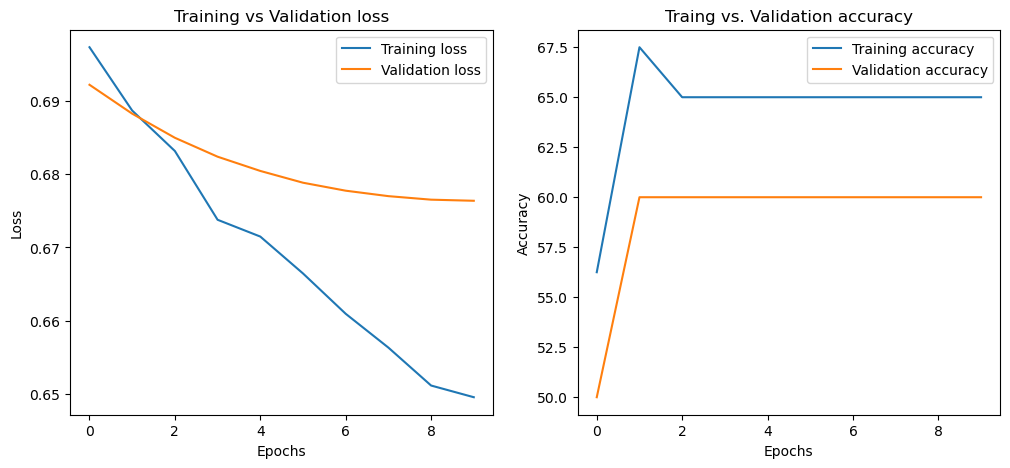

In [118]:
#plotting the result
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 5)) 

#plotting the loss
plt.subplot(1, 2, 1) 
plt.plot(train_losses, label = "Training loss")
plt.plot(val_losses, label = 'Validation loss')
plt.title('Training vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label = "Training accuracy")
plt.plot(val_accuracies, label = "Validation accuracy")
plt.title("Traing vs. Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.show()